In [8]:
import numpy as np
from skimage import io
from skimage.io import imread, imshow, show
import pandas as pd

path_to_image = input()
path_to_save = input()
name = input()
if name == "monochromacy":
    mono = io.imread(path_to_image, as_gray=True)
    io.imsave(path_to_save, mono)

D:/Users/Загрузки/ccc.jpg
D:/Users/Загрузки/cccc.jpg
protanopia


В ***X*** хранятся соответствия RGB цвета и RGB того как этот цвет видит человек с паталогией

In [9]:
path_to_tables = input()
X = pd.read_csv(path_to_tables + name + ".csv")
X

D:/Documents/NIS_hw1/


,r,g,b,r_new,g_new,b_new
0,0,0,0,0,0,0
1,0,0,16,0,0,22
2,0,0,32,0,35,44
3,0,0,48,0,35,66
4,0,0,64,0,35,87
...,...,...,...,...,...,...
4091,240,240,176,241,227,180
4092,240,240,192,243,230,188
4093,240,240,208,238,231,204
4094,240,240,224,238,231,222


Следующая функция ищет ближайший цвет к цвету ***default*** в таблице Х

In [10]:
def find_nearest(default, X):
    tmp1 = default[2] // 16
    tmp2 = default[1] // 16
    tmp3 = default[0] // 16
    indx = tmp1 + 16 * tmp2 + 16 * 16 * tmp3
    return np.array(X.iloc[indx, 3:])
    

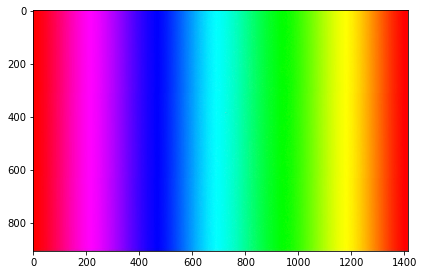

(907, 1415, 3)

In [11]:
to_transform = imread(path_to_image)
io.imshow(to_transform)
io.show()
to_transform.shape

Циклами проходим по всем пикселям изображения и меняем его цвет, в соответствии с таблицей

In [12]:
cache = {}
hits = 0
for i in range(to_transform.shape[0]):
    for j in range(to_transform.shape[1]):
        curr = to_transform[i][j]
        ct = tuple(curr)
        ct = tuple(map(int, ct))
        if ct in cache:
            hits += 1
            to_transform[i][j] = cache[ct]
        else:
            res = find_nearest(to_transform[i][j], X)
            to_transform[i][j] = res
            cache[ct] = res 

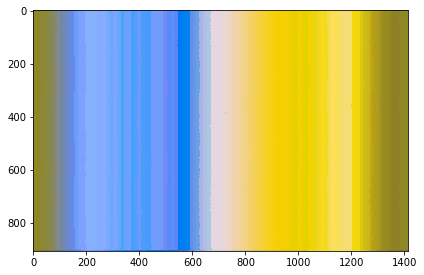

In [13]:
io.imshow(to_transform)
io.show()

In [7]:
io.imsave(path_to_save, to_transform)